In [1]:
#1.1 Import tensorflow and other libraries
import tensorflow as tf
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

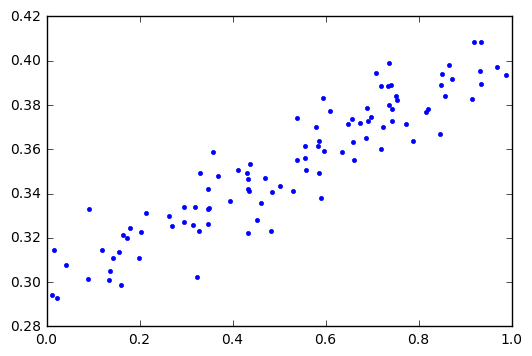

In [3]:
#1.2 create input data using numpy y = x * 0.1 + 0.3 + noise
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data))
y_data = x_data * 0.1 + 0.3 + noise
#plot our input data
plt.plot(x_data, y_data,'.')

In [19]:
#Build inference graph
#create variables W and b that compute y = W * x_data + b
W = tf.Variable(tf.random_uniform([1], 0.0, 1.0), name = "Initial_Weight")
b = tf.Variable(tf.zeros([1]), name = "Initial_Bias")
y = W * x_data + b
print(W.name)
print(b.name)

Initial_Weight_4:0
Initial_Bias_4:0


In [7]:
#Build training graph 
loss = tf.reduce_mean(tf.square(y - y_data)) # create an operation that calculates loss
optimizer = tf.train.GradientDescentOptimizer(0.5) # create an optimizer
train = optimizer.minimize(loss) #create an operation to minimize loss
init = tf.initialize_all_variables() #operation to initialize all variables

In [8]:
#what we have built so far
print(tf.get_default_graph().as_graph_def())

node {
  name: "random_uniform/shape"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 1
          }
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "random_uniform/min"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 0.0
      }
    }
  }
}
node {
  name: "random_uniform/max"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 1.0
      }
    }
  }
}
node {
  name: "random_uniform/RandomUniform"
  op: "RandomUniform"
  input: "random_uniform/shape"
  attr {
    key: "T"
    value {
    

In [10]:
#create a session and launch a graph
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y) # save initial values for plotting later
#see initial value of W and b
print(sess.run([W, b]))

[array([ 0.68265867], dtype=float32), array([ 0.], dtype=float32)]


In [11]:
#Perform training
for step in range(201):
    sess.run(train)
    if step % 2 == 0:
        print(step, sess.run([W, b]))
print sess.run([W, b])

(0, [array([ 0.64388192], dtype=float32), array([-0.0009623], dtype=float32)])
(2, [array([ 0.59134561], dtype=float32), array([ 0.03223657], dtype=float32)])
(4, [array([ 0.54254872], dtype=float32), array([ 0.0592576], dtype=float32)])
(6, [array([ 0.49853995], dtype=float32), array([ 0.08333119], dtype=float32)])
(8, [array([ 0.45895156], dtype=float32), array([ 0.10496311], dtype=float32)])
(10, [array([ 0.42334768], dtype=float32), array([ 0.12441591], dtype=float32)])
(12, [array([ 0.39132795], dtype=float32), array([ 0.14191031], dtype=float32)])
(14, [array([ 0.3625316], dtype=float32), array([ 0.15764356], dtype=float32)])
(16, [array([ 0.33663413], dtype=float32), array([ 0.17179295], dtype=float32)])
(18, [array([ 0.31334373], dtype=float32), array([ 0.18451795], dtype=float32)])
(20, [array([ 0.29239798], dtype=float32), array([ 0.19596194], dtype=float32)])
(22, [array([ 0.27356079], dtype=float32), array([ 0.20625387], dtype=float32)])
(24, [array([ 0.25661993], dtype=flo

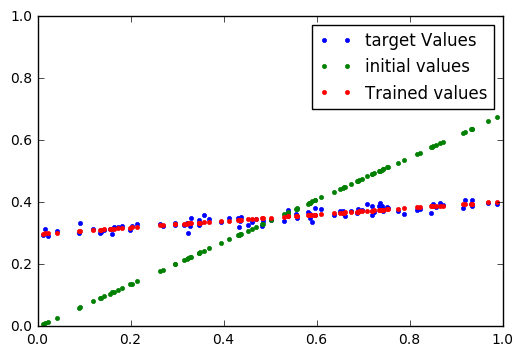

In [14]:
plt.plot(x_data, y_data, '.', label='target Values')
plt.plot(x_data, y_initial_values, '.', label='initial values')
plt.plot(x_data, sess.run(y), '.', label='Trained values')
plt.legend()
plt.ylim(0, 1.0)
plt.show()